In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import scipy.stats as stats

# Binomial Distribution

80% of all visitors buy. Random sample of 10. (probability mass function)
1. Probability that every visitor will buy? 
2. Probability that a maxium of 7 visitors will buy

probability that all ten buy is: 0.10737418240000011
the probability that 7 or less buy is 0.3222004735999997


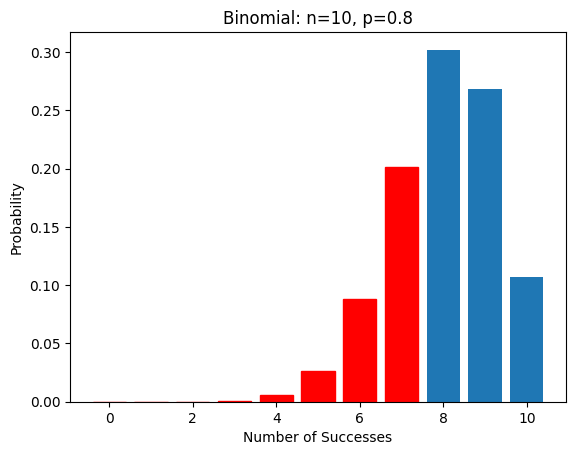

In [50]:
k = np.arange(11)
n = 10 
p = .8
binomial = stats.binom.pmf(k=k, n=n, p=p)
ans1 = binomial[-1]
ans2 = sum(binomial[:8]) # Cumulative probability function CDF
ans2 = stats.binom.cdf(k=7, n=n, p=p)
print(f'probability that all ten buy is: {ans1}')
print(f'the probability that 7 or less buy is {ans2}')

bar = plt.bar(k, binomial)
plt.title(f'Binomial: n={n}, p={p}')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
for i in range(0, 8):
    bar[i].set_color('r')
plt.show()


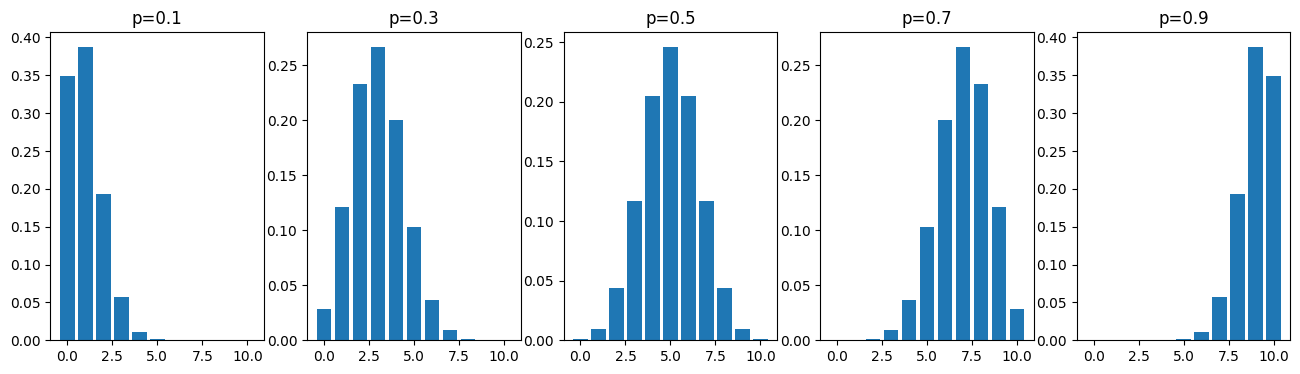

In [51]:
k = np.arange(11)
n = 10 
fig, axes = plt.subplots(1, 5, figsize=(16, 4))
axes = axes.flatten()
for i, p in enumerate([.1, .3, .5, .7, .9]):
    binomial = stats.binom.pmf(k=k, n=n, p=p)
    axes[i].bar(x=k, height=binomial)
    axes[i].set_title(f'p={p}')
plt.show()


# Uniform distribution
X is a continuous random variable. Let's see the distribution of X and answer the below questions.


1. Find the probability that a randomly selected software debugging requires less than three hours.

2. Find the probability that a randomly selected software debugging requires more than two hours.

3. Find the 50th percentile of the software debugging time.

   Bug ID  time
0   12986  2.42
1   12987  2.03
2   12988  2.74
3   12989  3.21
4   12990  3.40


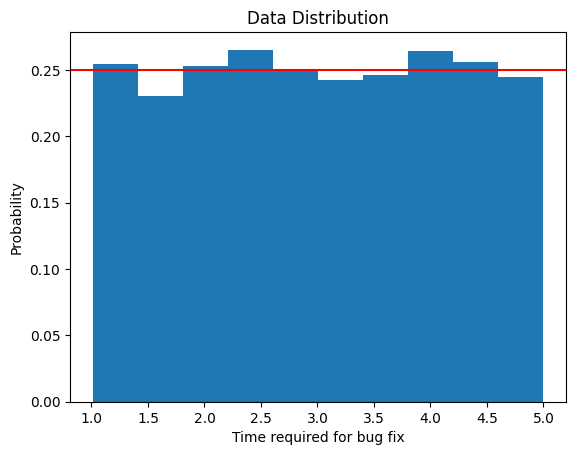

In [228]:
debugging = pd.read_csv('data/debugging.csv')
debugging.rename(columns={'Time Taken to fix the bug': 'time'}, inplace=True)
print(debugging.head())
plt.hist(debugging['time'], density=True)
plt.axhline(1/4, color='red')
plt.xlabel('Time required for bug fix')
plt.ylabel('Probability')
plt.title('Data Distribution')
plt.show()

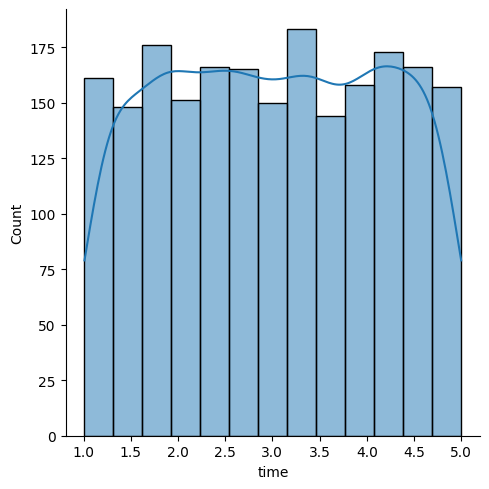

In [71]:
sns.displot(debugging['time'], kde=True)
plt.show()

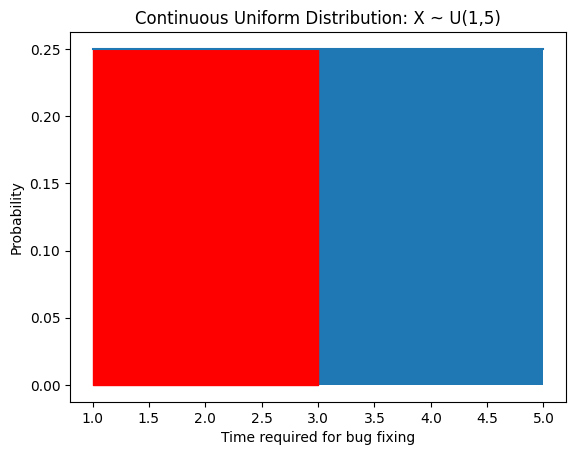

the probability that a repari will take at most 3 hours


np.float64(0.5)

In [80]:
x = np.linspace(1, 5, 50)
probs = stats.uniform.pdf(x, loc=1, scale=4)
x1 = np.linspace(1, 3, 25)
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, stats.uniform.pdf(x=x1, loc=1, scale=4), color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()
print('the probability that a repari will take at most 3 hours:')
stats.uniform.cdf(x=3, loc=1, scale=4)

In [84]:
x1

array([2.        , 2.15789474, 2.31578947, 2.47368421, 2.63157895,
       2.78947368, 2.94736842, 3.10526316, 3.26315789, 3.42105263,
       3.57894737, 3.73684211, 3.89473684, 4.05263158, 4.21052632,
       4.36842105, 4.52631579, 4.68421053, 4.84210526, 5.        ])

In [89]:
1 - stats.uniform.cdf(x=4.2, loc=1, scale=4)

np.float64(0.19999999999999996)

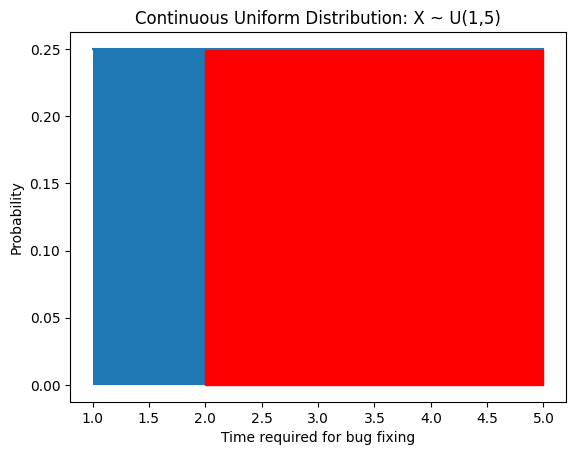

the probability that a repari will more than two hours


np.float64(0.75)

In [87]:
x1 = np.linspace(2, 5, 30)
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, stats.uniform.pdf(x=x1, loc=1, scale=4), color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()
print('the probability that a repari will more than two hours')
1 - stats.uniform.cdf(x=2, loc=1, scale=4)

# Normal Distribution
A testing agency wants to analyze the complexity of SAT Exam 2020. They have collected the SAT scores of 1000 students in "sat_score.csv". Let's answer some of the questions that will help to decide the complexity of SAT exam 2020.


 
1. Calculate the probability that a student will score less than 800 in SAT exam.
2. Calculate the probability that a student will score more than 1300 in SAT exam.
3. Calculate the minimum marks a student must score to secure the 90th percentile.
4. Calculate the minimum marks a student must score to be in the top 5%.

In [229]:
scores = pd.read_csv('data/sat_score.csv')
mu = scores['score'].mean()
sigma = scores['score'].std()
print(f'The sample mean is {round(mu,2)}')
print(f'The sample std is {round(sigma,2)}')
scores.head()

The sample mean is 1007.46
The sample std is 204.43


,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


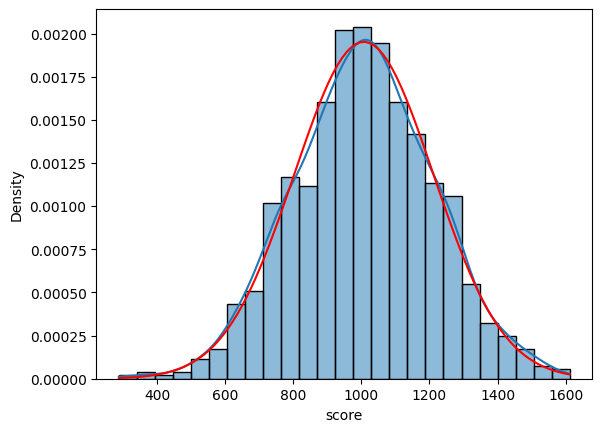

red line or a normal distribution closely matches the real data


In [122]:
density = pd.DataFrame()
density['x'] = np.linspace(
    scores['score'].min() - 0.01, scores['score'].max() + 0.01, 100
)
density['pdf'] = stats.norm.pdf(density['x'], mu, sigma)
fig, ax = plt.subplots()
sns.histplot(scores['score'], ax=ax, kde=True, stat='density')
ax.plot(density['x'], density['pdf'], color='red')
plt.show()
print('red line or a normal distribution closely matches the real data')

0.1551 that a student will score less than 800
0.0762 that a student will score more than 1300


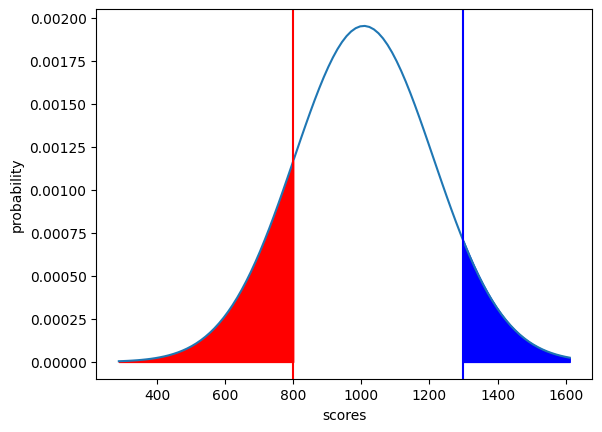

In [129]:
prob_less_than_800 = stats.norm.cdf(800, mu, sigma)
print(f'{round(prob_less_than_800,4)} that a student will score less than 800')

prob_more_1300 = 1 - stats.norm.cdf(1300, mu, sigma)
print(f'{round(prob_more_1300,4)} that a student will score more than 1300')

plt.plot(density['x'], density['pdf'])
plt.axvline(x=800, c='r')
less_800 = np.linspace(density['x'].min(), 800, 50)
plt.fill_between(less_800, stats.norm.pdf(less_800, mu, sigma), color='r')

plt.axvline(x=1300, c='b')
more_1300 = np.linspace(1300, density['x'].max(), 40)
plt.fill_between(more_1300, stats.norm.pdf(more_1300, mu, sigma), color='b')

plt.xlabel('scores')
plt.ylabel('probability')
plt.show()

In [136]:
# 1.285 = (x - mu) / sigma, find 1.285 in the z-table
top_90 = 1.285 * sigma + mu 
print(f'{round(top_90)} to score in 90th precentile')

# 1.65 = (x - mu) / sigma, find 1.65 in z-table for .95%
top_5 = 1.65 * sigma + mu
print(f'{round(top_5)} to score in 95th precentile') 

1270 to score in 90th precentile
1345 to score in 95th precentile


In [152]:
stats.norm.ppf(.90, mu, sigma)

np.float64(1269.4424694794877)

1269 to score in 90th precentile
1344 to score in 95th percentile


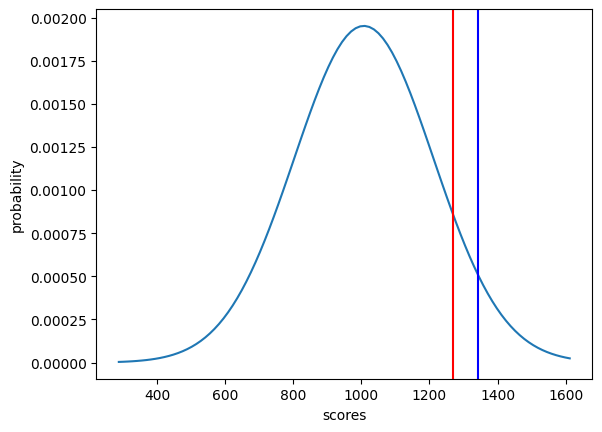

In [147]:
top_90 = stats.norm.ppf(.9, mu, sigma)
print(f'{round(top_90)} to score in 90th precentile')

top_5 = stats.norm.ppf(.95, mu, sigma)
print(f'{round(top_5)} to score in 95th percentile')

plt.plot(density['x'], density['pdf'])
plt.axvline(x=1269, c='r')
plt.axvline(x=1344, c='b')
plt.xlabel('scores')
plt.ylabel('probability')
plt.show()

# Standardizaiton
sat: mean = 1000, std = 200
act: mean = 20, std = 5

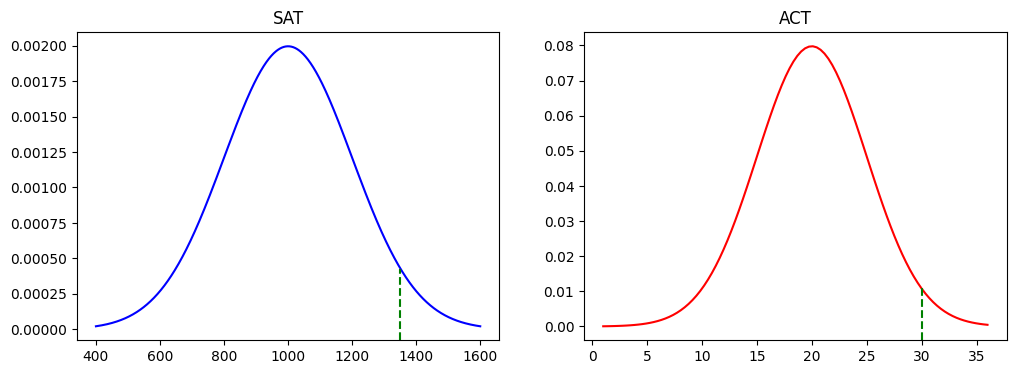

In [171]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 4))
x = np.linspace(400, 1600, 1000)
ax1.plot(x, stats.norm.pdf(x, loc=1000, scale=200), color='b')
ax1.set_title('SAT')
ax1.axvline(1350, ymax=0.23, linestyle='--', color='green')

x1 = np.linspace(1, 36, 100)
ax2.plot(x1, stats.norm.pdf(x1, loc=20, scale=5), color='r')
ax2.set_title('ACT')
ax2.axvline(30, ymax=0.18, linestyle='--', color='g')
plt.show()

# get z-scores
sat_score = (1350 - 1000) / 200
act_score = (30 - 20) / 5
print(f'z-score for sat: {sat_score}')
print(f'z-score for act: {act_score}')

z-score for sat: 1.75
z-score for act: 2.0


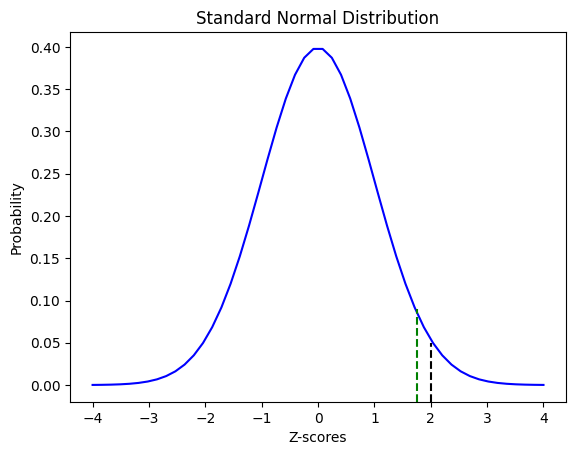

In [172]:
# get z-scores
sat_score = (1350 - 1000) / 200
act_score = (30 - 20) / 5
print(f'z-score for sat: {sat_score}')
print(f'z-score for act: {act_score}')

fig, ax = plt.subplots()
x = np.linspace(-4,4,50)
ax.plot(x, stats.norm.pdf(x, loc = 0, scale = 1), color = 'b')
ax.set_title('Standard Normal Distribution')
ax.set_xlabel('Z-scores')
ax.set_ylabel('Probability')
ax.axvline(sat_score, ymax = 0.25, linestyle = '--', color = 'green')
ax.axvline(act_score, ymax = 0.16, linestyle = '--', color = 'black')
plt.show()

In [175]:
mu = 55000 
sigma = 6200
below_59 = stats.norm.cdf(59000, mu, sigma) 
above_67 = stats.norm.cdf(67000, mu, sigma)
above_67 - below_59

np.float64(0.23294586132016037)

# Central Limit Theorem (CLT)

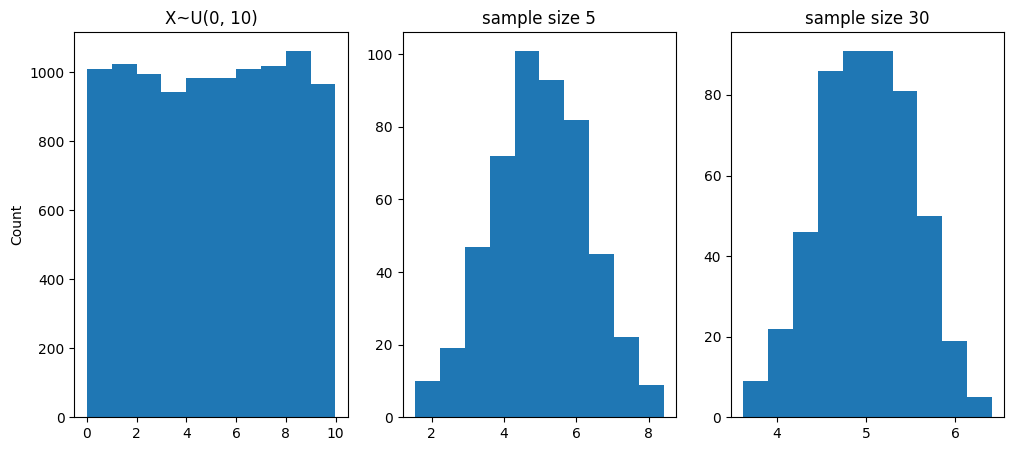

In [191]:
uniform_pop = stats.uniform.rvs(0, 10, size=10000)
sample_means_5 = []
sample_means_30 = []
for j in range(500):
    sample = np.random.choice(uniform_pop, size=5)
    sample_mean = np.mean(sample)
    sample_means_5.append(sample_mean)

    sample = np.random.choice(uniform_pop, size=30)
    sample_mean = np.mean(sample)
    sample_means_30.append(sample_mean)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
ax1.hist(uniform_pop)
ax1.set_ylabel('Count')
ax1.set_title('X~U(0, 10)')
ax2.hist(sample_means_5)
ax2.set_title('sample size 5')
ax3.hist(sample_means_30)
ax3.set_title('sample size 30')
plt.show()

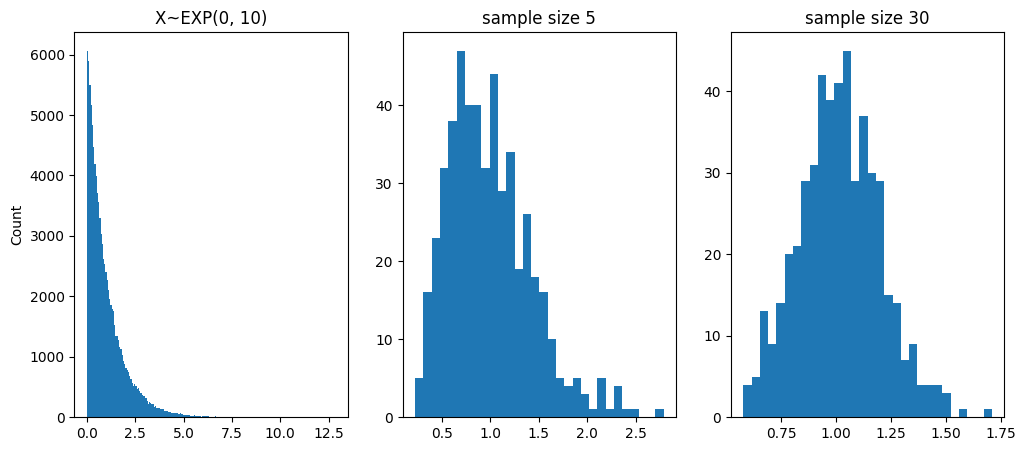

In [199]:
exp_pop = stats.expon.rvs(size=100000)
sample_means_5 = []
sample_means_30 = []
for j in range(500):
    sample = np.random.choice(exp_pop, size=5)
    sample_mean = np.mean(sample)
    sample_means_5.append(sample_mean)

    sample = np.random.choice(exp_pop, size=30)
    sample_mean = np.mean(sample)
    sample_means_30.append(sample_mean)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
ax1.hist(exp_pop, 200)
ax1.set_ylabel('Count')
ax1.set_title('X~EXP(0, 10)')
ax2.hist(sample_means_5, 30)
ax2.set_title('sample size 5')
ax3.hist(sample_means_30, 30)
ax3.set_title('sample size 30')
plt.show()

# Point Estimation

In [204]:
sample = np.array([120, 55, 60, 10, 8, 150, 44, 58, 62, 123])
X_bar = np.mean(sample)
X_bar

np.float64(69.0)

# Confidence Estimation 

In [219]:
stats.norm.interval(.95, loc=180, scale=36)

(np.float64(109.44129655655806), np.float64(250.55870344344194))

In [217]:
n = 50 
x_bar, sigma = 110, 7 
normal = np.round(stats.norm.interval(.95, loc=x_bar, scale=sigma / np.sqrt(n)), 2)
t = np.round(stats.t.interval(.95, df=n-1, loc=x_bar, scale=sigma / np.sqrt(n)), 2)
print(f'confidence interveral from normal distribution: {normal}')
print(f'confidence interveral from t distribution: {t}')

confidence interveral from normal distribution: [108.06 111.94]
confidence interveral from t distribution: [108.01 111.99]


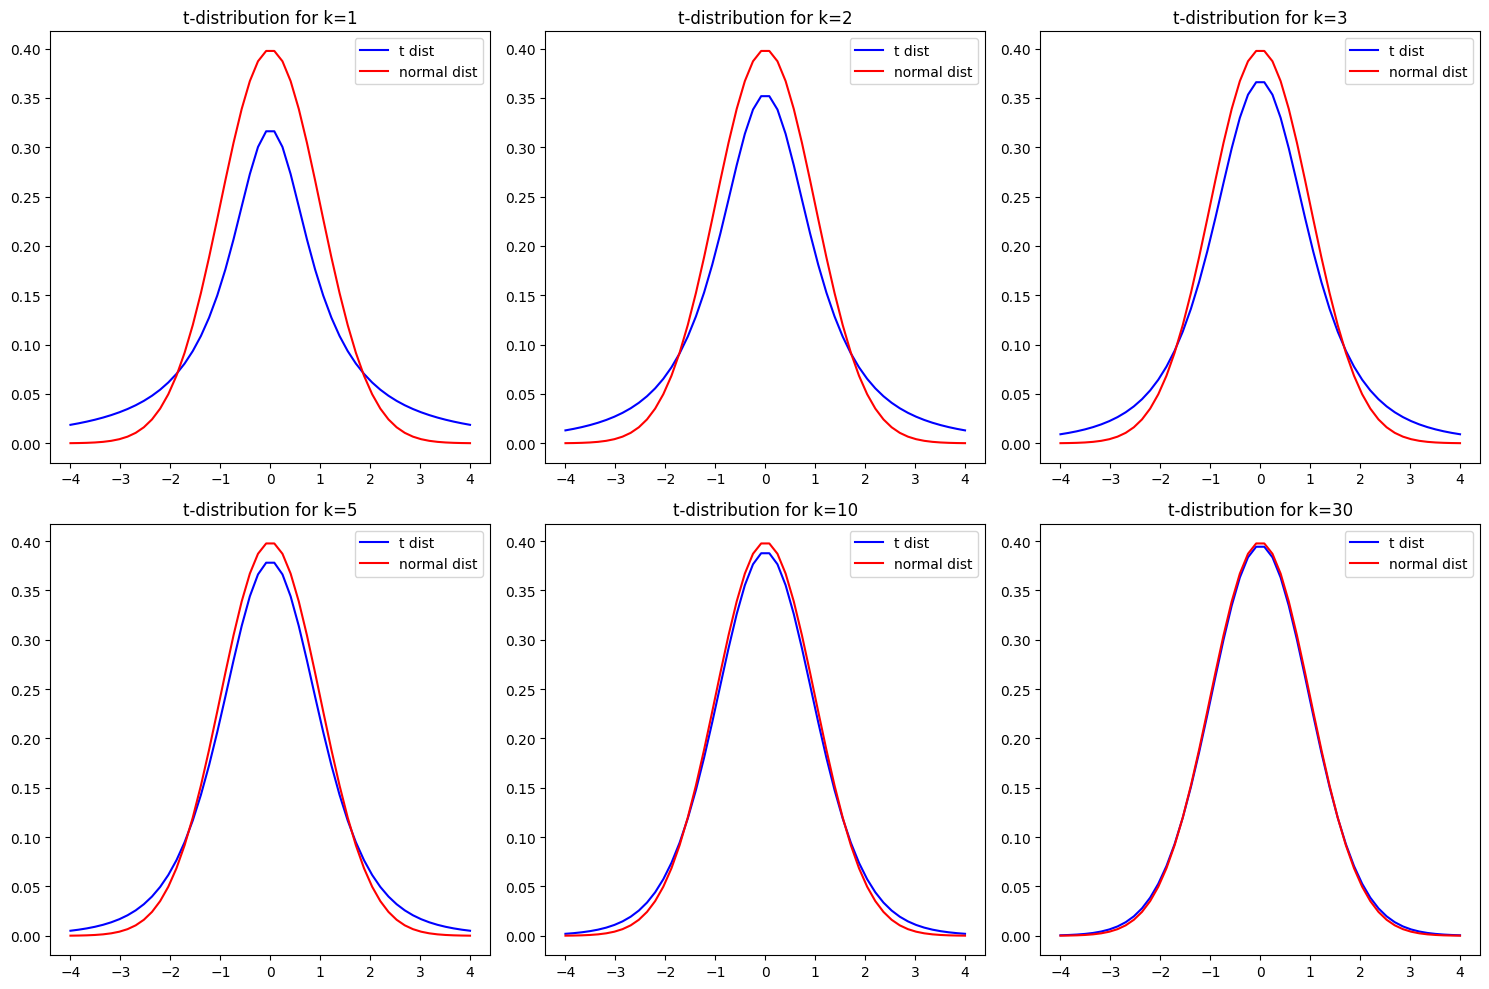

In [211]:
# t distribution
fig, axes = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(15, 10))
axes = axes.ravel()
for i, k in zip(range(6), [1, 2, 3, 5, 10, 30]):
    ax = axes[i]
    ax.plot(x, stats.t.pdf(x, df=k), color="blue", label="t dist")
    ax.plot(x, stats.norm.pdf(x), color="red", label="normal dist")
    ax.set_title("t-distribution for k={0}".format(k))
    ax.legend(loc="upper right", fontsize=10)
plt.tight_layout()

# Hypothesis Testing


In [6]:
# Ha: sample_mu > mu
mu = 5 
std = 1.3 
n = 45 
sample_mu = 5.25
se = std / np.sqrt(n)

ans1 = 1 - stats.norm.cdf(x=sample_mu, loc=mu, scale=se)

test_stat = (sample_mu - mu) / se
ans2 = 1 - stats.norm.cdf(test_stat)

print(ans1, ans2)

0.09851852092578695 0.09851852092578695


In [28]:
# Ha: sample_mu != mu
std = 50 
mu = 600 
n = 36
sample_mu = 580 
se = std / np.sqrt(n)

ans1 = stats.norm.cdf(sample_mu, mu, se)

test_stat = (sample_mu - mu) / se 
ans2 = stats.norm.cdf(test_stat)

print(ans1, ans2)

print(f'rejection z-score: {stats.norm.ppf(.975)}')
print(f'our z-score: {abs(test_stat)}')

0.008197535924596131 0.008197535924596131
rejection z-score: 1.959963984540054
our z-score: 2.4


In [24]:
stats.norm.ppf(.975)

np.float64(1.959963984540054)